# Credit Card Defaulter
1) ID - Id of customer
2) Default - Is the person a loan defaulter
3) Student - Is the person a student
4) Balance - balance in his/her account
5) Income - His/Her income

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credit_card_defaulter.csv')

In [3]:
df.default = df.default.replace(to_replace=['No', 'Yes'], value=[0, 1])
df.student = df.student.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


In [6]:
X = df.drop('default', axis=1)
y = df['default']

# Training and test sample

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42, stratify=df['default'])

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [10]:
from sklearn.compose import ColumnTransformer
transform_pipeline = ColumnTransformer([
    ('ss', StandardScaler(), ['balance', 'income']),
],remainder='passthrough')

In [11]:
X_train_ss = transform_pipeline.fit_transform(X_train)

In [12]:
X_test_ss = transform_pipeline.fit_transform(X_test)

In [13]:
#sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_ss, y_train)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict(X_test)

C:\Users\adilk\GlebMikhaylov\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train_ss, y_train, cv=3, scoring="accuracy")

array([0.9712, 0.9712, 0.9676])

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_ss, y_train, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[7221,   29],
       [ 196,   54]], dtype=int64)

In [18]:
confusion_matrix(y_test, sgd_clf.predict(X_test_ss))

array([[2409,    8],
       [  62,   21]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, sgd_clf.predict(X_test_ss)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2417
           1       0.72      0.25      0.38        83

    accuracy                           0.97      2500
   macro avg       0.85      0.62      0.68      2500
weighted avg       0.97      0.97      0.97      2500



# Precision and Recall

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.6506024096385542

In [20]:
recall_score(y_train, y_train_pred)

0.216

In [21]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.32432432432432434

# Precision/Recall Trade-off

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train_ss, y_train, cv=3,
                             method="decision_function")

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [24]:
thresholds.max()

2.1886126552194027

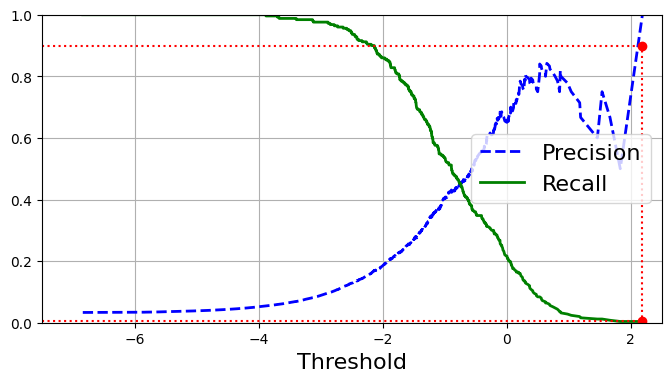

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                             
    plt.axis([-7.5, 2.5, 0, 1])             

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-7.5, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-7.5, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()

In [26]:
(y_train_pred == (y_scores > 0)).all()

True

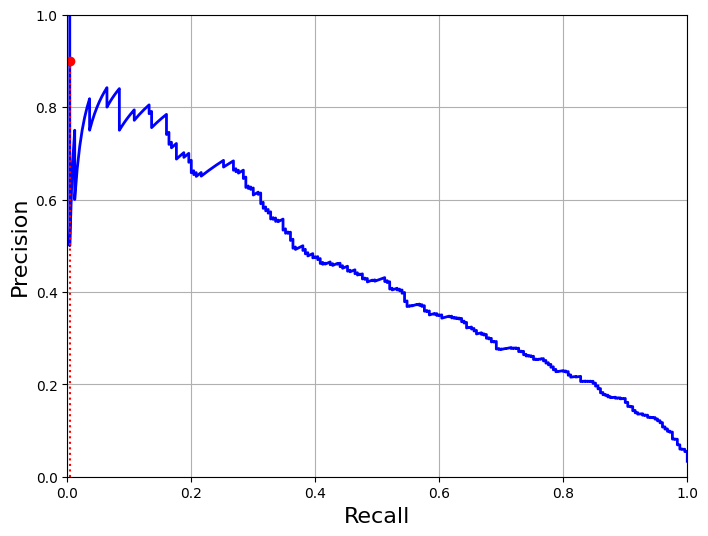

In [27]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

# The ROC Curve

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

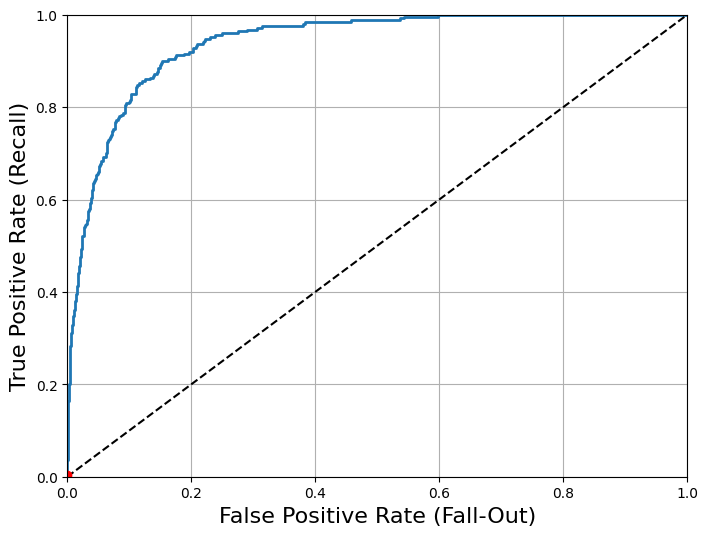

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")                                             
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9399696551724139

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train_ss, y_train, cv=3,
                                    method="predict_proba")

In [32]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

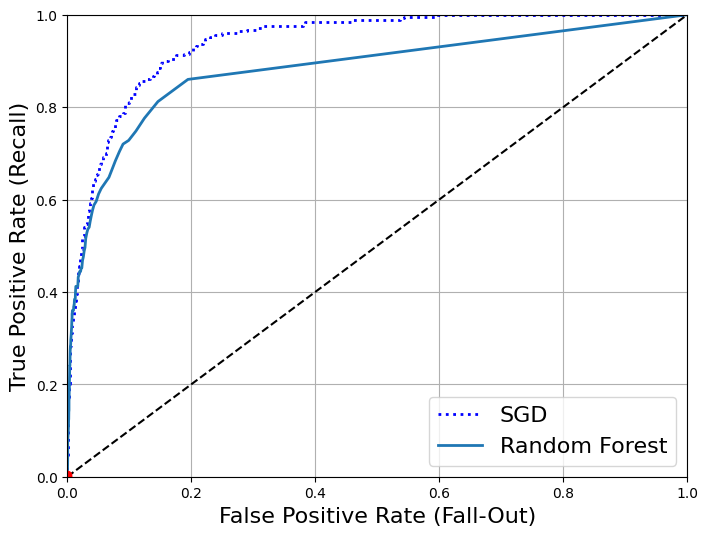

In [33]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()